In [28]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
/var/folders/hw/1xcjmtrs1c31k9myf8c3p_ph0000gn/T/ipykernel_2564/2422380159.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 8])
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


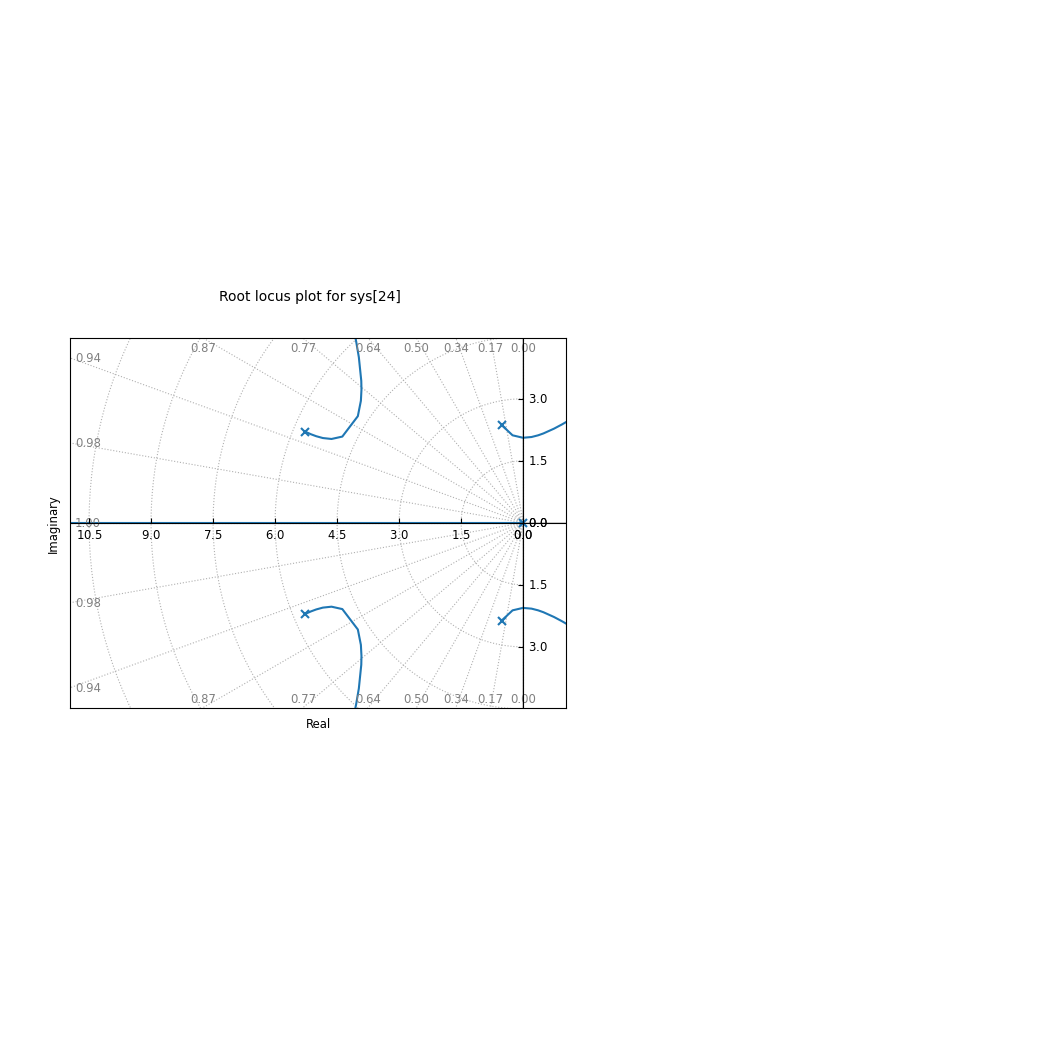

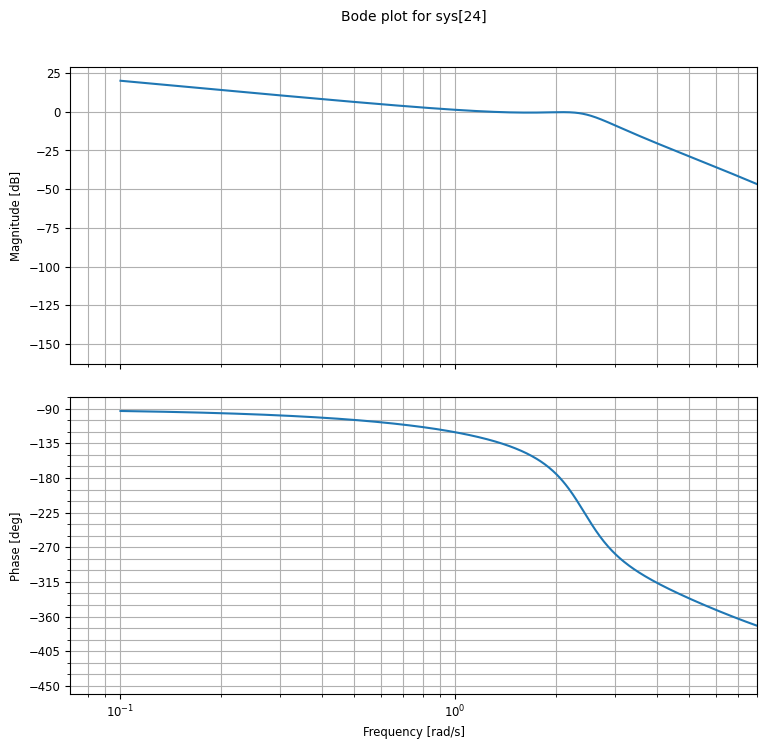

In [29]:
w = 4
zeta = 0.7 
num = np.array([12*w**2])
den_base = np.convolve([1, 6, 0, 0], [1, 2*zeta*w, w**2])
den = den_base + np.array([0, 0, 0, 0, 12*w**2, 0]) 

Glp = tf(num, den)
rlocus(Glp)
bode(Glp)
fig = plt.gcf().set_size_inches(8, 8)
plt.xlim([0, 8])
plt.show()

In [30]:
def plot_margins(sys):
#    mag,phase,omega = bode(sys,dB=True,Plot=False)
    mag,phase,omega = bode(sys,dB=True,plot=False)
    magdB = 20*np.log10(mag)
    phase_deg = phase*180.0/np.pi
    Gm,Pm,Wcg,Wcp = margin(sys)
    GmdB = 20*np.log10(Gm)
    ##Plot Gain and Phase
    f,(ax1,ax2) = plt.subplots(2,1)
    ax1.semilogx(omega,magdB)
    ax1.grid(which="both")
    ax1.set_xlabel('Frequency (rad/s)')
    ax1.set_ylabel('Magnitude (dB)')
    ax2.semilogx(omega,phase_deg)
    ax2.grid(which="both")
    ax2.set_xlabel('Frequency (rad/s)')
    ax2.set_ylabel('Phase (deg)')
    ax1.set_title('Gm = '+str(np.round(GmdB,2))+' dB (at '+str(np.round(Wcg,2))+' rad/s), Pm = '+str(np.round(Pm,2))+' deg (at '+str(np.round(Wcp,2))+' rad/s)')
    ###Plot the zero dB line
    ax1.plot(omega,0*omega,'k--',linewidth=2)
    ###Plot the -180 deg lin
    ax2.plot(omega,-180+0*omega,'k--',linewidth=2)
    ##Plot the vertical line from -180 to 0 at Wcg
    ax2.plot([Wcg,Wcg],[-180,0],'r--',linewidth=2)
    ##Plot the vertical line from -180+Pm to 0 at Wcp
    ax2.plot([Wcp,Wcp],[-180+Pm,0],'g--',linewidth=2)
    ##Plot the vertical line from min(magdB) to 0-GmdB at Wcg
    ax1.plot([Wcg,Wcg],[np.min(magdB),0-GmdB],'r--',linewidth=2)
    ##Plot the vertical line from min(magdB) to 0db at Wcp
    ax1.plot([Wcp,Wcp],[np.min(magdB),0],'g--',linewidth=2)
    return Gm,Pm,Wcg,Wcp

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


(np.float64(1.0339474080247908),
 np.float64(49.20580336891919),
 np.float64(2.0571980430935906),
 np.float64(1.2752479472964153))

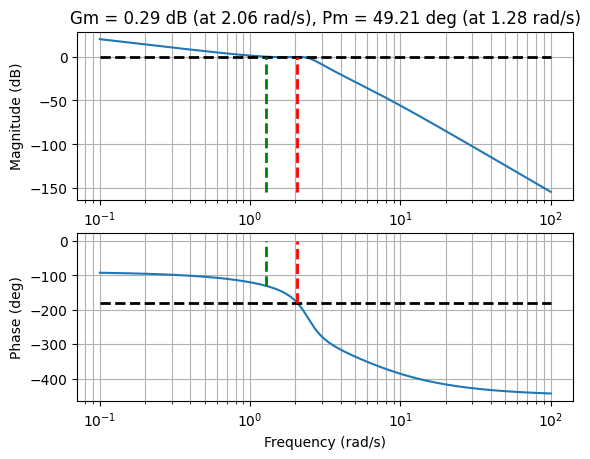

In [31]:
plot_margins(Glp)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


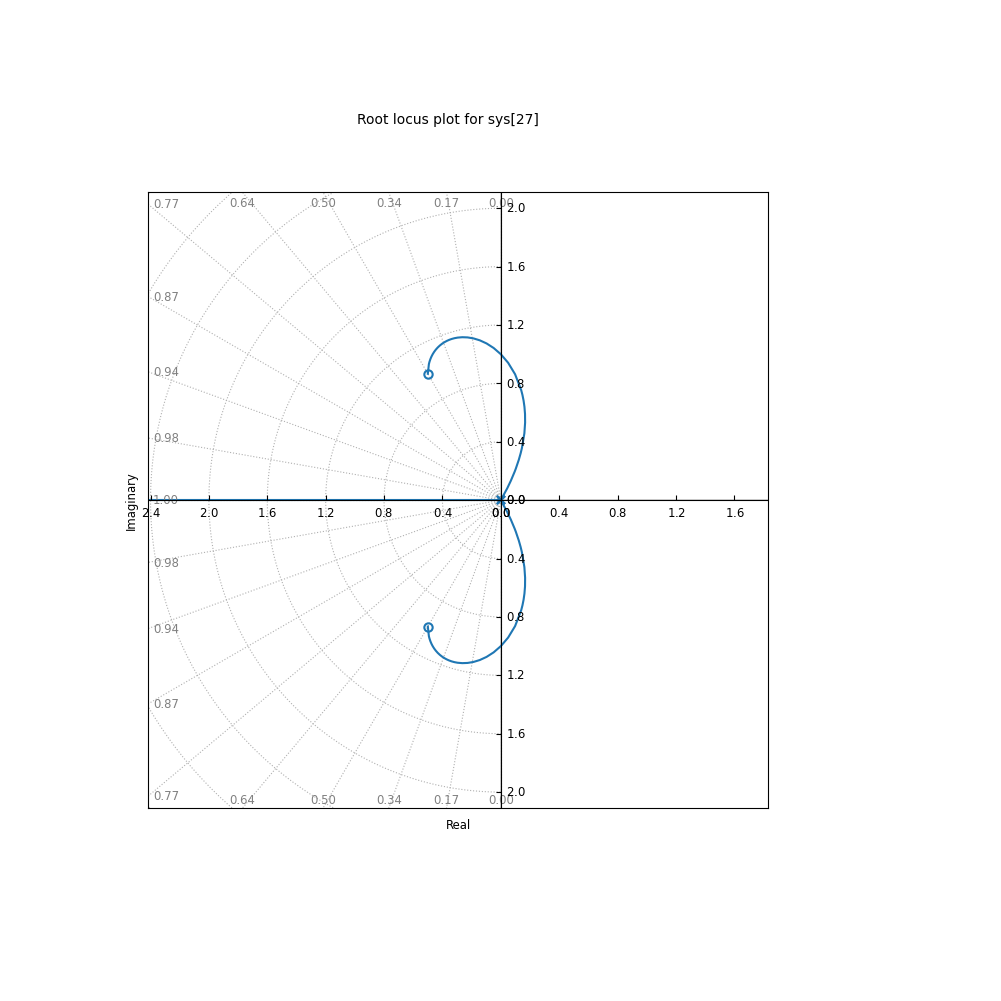

In [32]:
num = np.array([2,2,2])
den = np.array([1, 0, 0,0])

G = tf(num, den)
rlocus(G)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


(np.float64(0.5),
 np.float64(50.290385343381985),
 np.float64(1.0),
 np.float64(1.7692923542386294))

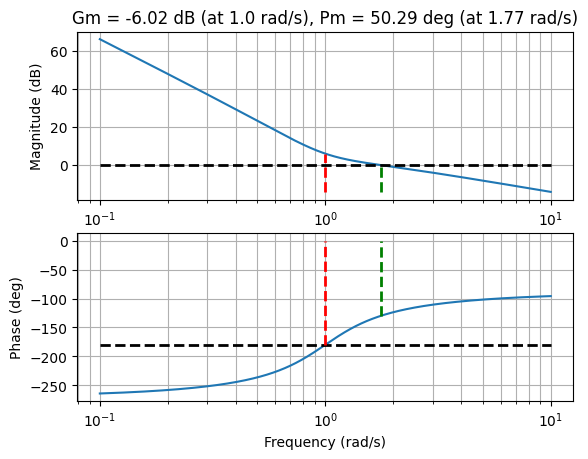

In [33]:
plot_margins(G)

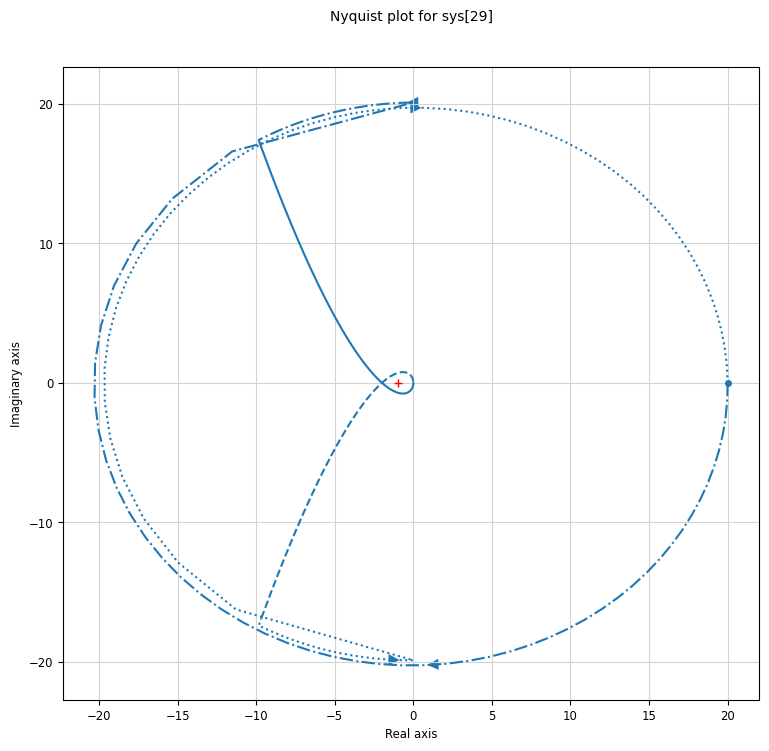

In [34]:
num = np.array([2,2,2])
den = np.array([1, 0, 0,0])

G = tf(num, den)
nyquist(G)
fig = plt.gcf().set_size_inches(8, 8)
plt.show()